# CC MNP 28/02/2024
   ### Simone INTINGARO - SPRINT A
   
# Chaîne de masse-ressort

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks


## Introduction
Le but de ce projet est d'analyser  un système masse-ressort composé comme suit:
> "On considère une chaîne de  𝑁+2
  masses  𝑚
  numérotées de  0
  à  𝑁+1
  et reliées entre elles par des ressorts de raideur  𝑘
 . Les masses  0
  et  𝑁+1
  sont maintenues fixes et on applique une force  𝐹cos(𝜔𝑡)
 , qui varie sinusoidalement en fonction du temps  𝑡
 , sur la masse  𝑁
 ." 
 
Nous allons tout d'abord montrer que le système présente un phénomène de résonnance, pour ensuite analyser son comportement lorsque la masse du système varie.

Nous allons modéliser l'amplitude des déplacements de chaque masse par la suite récurrente: $A_0=0$, $A_{N+1}=0$, $$-m\omega^2 A_n=k(A_{n+1}+A_{n-1}-2A_n)$$ pour $n$ de 1 à $N-1$ et $-m\omega^2 A_N=k(A_{N-1}-2A_N)+F$.

Pour résoudre numériquement le problème on utilise $\sqrt{k/m}$ comme unité pour les pulsations, $F/k$ comme unité pour les amplitudes et on pose $A_n = A u_n$ et $u_1=1$.

Notre suite se simplifie et se réduit à: $$ u_0=0 \ \ \ , \ \ \ u_1=1 \ \ \ , \ \ \ u_n=(2-\omega^2)u_{n-1}-u_{n-2} \ \ \  $$ 

avec le facteur $A$ donné par $$A=\frac{1}{(2-\omega^2)u_N-u_{N-1}} \ \ \ .$$

## Partie 1
Dans cette première partie on analyse le système pour montrer qu'un phénomène de résonnance existe.

Nous allons notamment étudier le comportement de la suite $$u_0=0 \ \ \ , \ \ \ u_1=1 \ \ \ , \ \ \ u_n=(2-\omega^2)u_{n-1}-u_{n-2} \ \ \ $$


Dans un premier temps nous allons représenter les valeurs des éléments de la suite $u_n/U$ en fonction de $n/N$, où $U$ est la valeur maximale de la suite, pour $\omega=\pi/N$ et $N=1000$

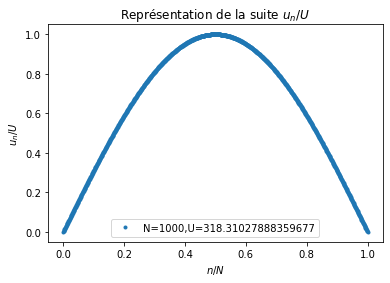

In [2]:
u0=0 #initialisation de la suite
u1=1

N=1000
omega = np.pi/N

n=np.linspace(0,N,N+1) #tableau des valeurs de n

def u(omega,ui,uii): #fonction associée
    un = (2-omega**2)*ui - uii
    return un

    
#on crée un tableau de 0 avec la même forme que n
suite = np.zeros_like(n) #tab des val de la suite u_n

suite[0]=u0
suite[1]=u1 #initialisation de la suite


for i in range(2,len(n)-1): #on applique les deux fonctions (f(x) et xi) par récurrence
    suite[i] = u(omega,suite[i-1],suite[i-2]) 

#on plotte les deux courbes
plt.plot(n/N,suite/max(suite), ".", label= "N={},U={}".format(N,max(suite))) #on représente suite/max(suite) en fonction de n/N
plt.xlabel("$n/N$")
plt.ylabel("$u_n/U$")
plt.title("Représentation de la suite $u_n/U$")
plt.legend()

Conditions aux limites?

On s'intéresse maintenant aux facteur $|A|$, c'est-à-dire la valeur absolue de l'amplitude des mouvements des masses. Nous allons calculer ce facteur pour $N=1000$ et $\omega=[0, 20/N]$ (pour 10000 valeurs de $\omega$). Nous allons représenter nous résultats sur un graphique semi-log y, en fonction de $N \omega / \pi$.

On rappelle l'expression de A: $$A=\frac{1}{(2-\omega^2)u_N-u_{N-1}} \ \ \ .$$
Le détail du calcul est dans le commentaires du code ci-dessous.

Text(0.5, 1.0, '$|A|$ en fonction de $N \\omega / \\pi$ (échelle semi-log y)')

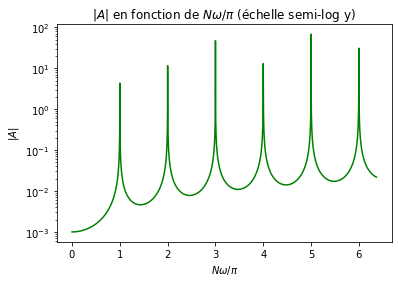

In [3]:
N = 1000
N_omega = 10000
u0=0
u1=1

omega_tab = np.linspace(0,20/N,N_omega) #tableau des valeurs de omega
n=np.linspace(0,N,N+1) #tableau des valeurs de n

#meme fonction qu'avant mais avec un tableau de omega
suite_tab = np.zeros((n.size,omega_tab.size)) #tab des val de la suite u_n (n lignes et omega_tab.size colonnes)

suite_tab[0,:] = u0*np.ones_like(omega_tab)
suite_tab[1,:] = u1*np.ones_like(omega_tab) #initialisation de la suite


for i in range(2,len(n)-1): #on applique la fonction
    suite_tab[i,:] = u(omega_tab,suite_tab[i-1,:],suite_tab[i-2,:])
    
A = 1/((2-omega_tab**2)*suite_tab[N-1,:]-suite_tab[N-2,:]) #on calcule le tableau des valeurs de A pour tout omega considéré

plt.plot(N*omega_tab/np.pi,np.abs(A),"g-")
plt.semilogy()

plt.xlabel("$N \omega / \pi$")
plt.ylabel("$|A|$")
plt.title("$|A|$ en fonction de $N \omega / \pi$ (échelle semi-log y)")



On peut déduire graphiquement qu'il existe un phénomène de résonnance pour les valeurs entières du facteur $N \omega / \pi$. Quand on change le nombre de valeurs de $\omega$ on observe un changement dans la forme de notre courbe.

Après avoir détérminé l'existence de valeurs de $\omega$ de résonnance, nous allons maintenant représenter les suite $u_n/U$ en fonction de $n/N$ pour les 4 premières valeurs des pulsations de résonance.
Nous allons finalement comparer graphiquement ces résultats avec un modèle sinusoïdal $v_n=\sin(\omega_r n)$, avec $\omega_r$ la valeurs de la pulsation pour chacune des 4 suites représentées.

Text(0.5, 1.0, 'Suites calculées en fonction de n/N')

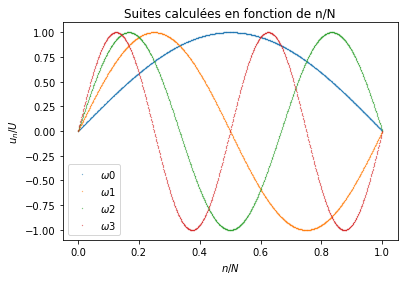

In [4]:
#On a déjà calculé la suite pour toute les valeurs de omega
#Il faut juste selectionner les colonnes corréspondantes aux 4 premières valeurs de omega_résonnance
#Les valeurs de omega_resonnance correspondent aux pics de la suite |A|

peaks, _ = find_peaks(A,A>0) #On trouve l'indice corréspondant aux maxima de |A|, càd pour les valeurs de omega de résonnance

suite_res = suite_tab[:,peaks[:4]] #suite calculée pour les 4 premiéres valeurs de oméga de résonnance

# Création de l'array des U (val max) pour les 4 suites
U = np.zeros_like(suite_res[0,:])
for i in range(len(suite_res[0,:])):
   U[i] = max(suite_res[:,i])

#On plot les 4 premiers (0,1,2,3)
plt.plot(n/N,suite_res/U,".",markersize=0.5)
plt.legend(["$\omega0$","$\omega1$","$\omega2$","$\omega3$"])
plt.xlabel("$n/N$")
plt.ylabel("$u_n/U$")

plt.title("Suites calculées en fonction de n/N")


Text(0.5, 1.0, 'Modèle sinusoidal en fonction de n/N')

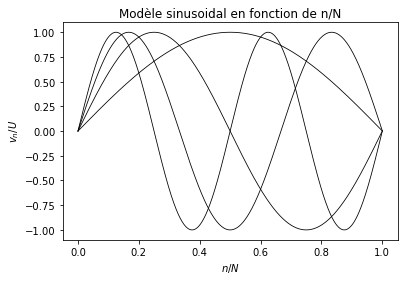

In [5]:
#Modèle sinusoidale v_n=sin(omega-r *n)

plt.plot(n/N,np.sin(omega_tab[peaks[:4]]*n.reshape(n.size,1)),color="k",linewidth=0.8)

plt.xlabel("$n/N$")
plt.ylabel("$v_n/U$")

plt.title("Modèle sinusoidal en fonction de n/N")


Text(0.5, 1.0, 'Comparaison suites calculées et modèle')

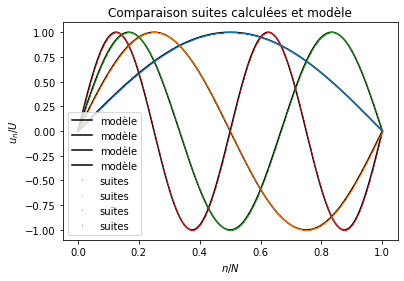

In [6]:
### Comparaison

#Modèle sinusoidale v_n=sin(omega-r *n)

plt.plot(n/N,np.sin(omega_tab[peaks[:4]]*n.reshape(n.size,1)),color="k",linewidth=1.5,label="modèle")

#Suites calculées

plt.plot(n/N,suite_res/U,".",markersize=0.5, label="suites")
plt.legend()
plt.xlabel("$n/N$")
plt.ylabel("$u_n/U$")

plt.title("Comparaison suites calculées et modèle")

Nous remarquons que notre modèle sinusoïdal est en accord avec les résultats trouvés pour les suites.

## Partie 2

Dans cette partie, les masses de $0$ à $N/2$ valent maintenant $m'=rm$. La suite d'éléments $u_n$ est donnée par $$u_0=0 \ \ \ , \ \ \ u_1=1 \ \ \ $$ $$u_n=(2-r\omega^2)u_{n-1}-u_{n-2} \ \ \ \mathrm{pour} \ \ \ n\le N/2 \ \ \ ,$$ $$u_n=(2-\omega^2)u_{n-1}-u_{n-2} \ \ \ \mathrm{pour} \ \ \ n > N/2 \ \ \ .$$
Le facteur $A$ est toujours donné par la même expression. On utilisera $N=1000$ pour toute cette partie.

Nous allons premièrement représenter l'amplitude de $|A|$ en fonction du paramètre $N \omega / \pi$ pour $\omega=[0,4/N]$, et $r=1,2,3,4,5$. On utilisera 10000 valeurs de la pulsation $\omega$ et une échelle logarithmique pour l'axe des ordonnées.

In [7]:
## Définition de la fonction pour la nouvelle suite

def suite2(r,omega,ui,uii,i,N=1000):
    '''Prend en entrée le paramètre r, omega, ui=u_n-1, uii = u_n-2, N = nb totale d'elements
    i = indice de l'élément à calculer. Renvoie u_n
    Le paramètre à une valeur N=1000 s'il n'est pas renseigné '''
    
    if i <=N/2:
        un = (2-r*omega**2)*ui-uii
    else:
        un = (2-omega**2)*ui-uii
    return un

    

Text(0.5, 1.0, '$|A|$ en fonction de $N \\omega / \\pi$ (échelle semi-log y)')

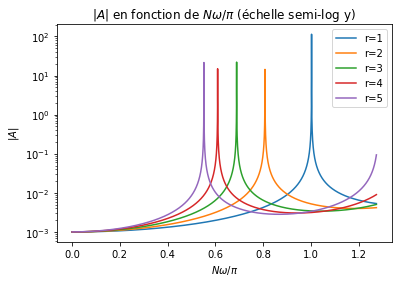

In [8]:
N=1000
omega2 = np.linspace(0,4/N,10000) #tableau des val de omega
r_tab = np.arange(1,6,1) #tableau des r
             
             
u0 = 0
u1 = 1 #initialisation

#Création du tableau des valeurs de la s
             
             
             
             
suite_tab2 = np.zeros((N,omega2.size)) ##tab des val de la suite u_n (N lignes et omega_tab.size colonnes)

suite_tab2[0,:] = u0*np.ones_like(omega2) 
suite_tab2[1,:] = u1*np.ones_like(omega2) #initialisation de la suite

for r in r_tab:
    for i in range(2,N-1): #on applique la fonction
        suite_tab2[i,:] = suite2(r,omega2,suite_tab2[i-1,:],suite_tab2[i-2,:],i)

    A_r = 1/((2-omega2**2)*suite_tab2[N-1,:]-suite_tab2[N-2,:]) #on calcule le tableau des valeurs de A pour tout omega considéré
    plt.plot(N*omega2/np.pi,np.abs(A_r))
    
plt.semilogy()
plt.xlabel("$N \omega / \pi$")
plt.ylabel("$|A|$")
plt.legend(["r=1","r=2","r=3","r=4","r=5"])
plt.title("$|A|$ en fonction de $N \omega / \pi$ (échelle semi-log y)")



On remarque que pour r = 1 (donc le cas que l'on a analysé dans la partie 1) la résonnance se vérifie pour $N \omega / \pi = 1$, alors que pour les autres valuers de r, $N \omega / \pi$ prend des valeurs non-entières.


Nous allons vérifier cette observation en trouvant numériquement la valeur de la première pulsation de résonnance $\omega_1$ (corréspondante au cas r=1).
Pour ce faire nous allons exploiter la fonction ```find_peaks()``` du module ```scipy.signal```.

In [9]:
#Find_peaks()
peak_tab=[] #on aura 5 pics car on s'intéresse à la première fréquence de résonnance pour chacune des 5 valeurs de r
for r in r_tab:
    for i in range(2,N-1): #on applique la fonction
        suite_tab2[i,:] = suite2(r,omega2,suite_tab2[i-1,:],suite_tab2[i-2,:],i)

    A_r = 1/((2-omega2**2)*suite_tab2[N-1,:]-suite_tab2[N-2,:]) #on calcule le tableau des valeurs de A pour tout omega considéré
    peaks,_ = find_peaks(A_r) #on trouve les pics pour la valeur de r avec laquelle on a calculé A
    peak_tab.append(peaks[0]) #on l'ajoute à une liste (l'indice 0 corréspond à r=1, 1 à r=2 etc)

print("Valeur de la première pulsation de résonnance: {}".format(omega2[peak_tab]))
print("N*omega/pi: {}".format(omega2[peak_tab]*N/np.pi))


Valeur de la première pulsation de résonnance: [0.00314791 0.00253585 0.00216302 0.00191379 0.00173337]
N*omega/pi: [1.0020124  0.80718727 0.68850947 0.60917872 0.55174987]


Notre observation était correcte jusqu'à la 3e chiffre significative, en effet la valeur de $\omega_1$ pour r=1 n'est pas 1 mais 1,0020124. Pour les autres valeurs de r on a bien des valeurs non entière de $\omega_1$.

On représente enfin la valeur de $\omega_1$ en fonction de r, pour r $\in [1,100]$. Nous allons vérifier que la valeur de $\omega_1$ est approximé par la relation pour r et N assez grands $$\omega_1 \approx \frac{4,06}{N \sqrt r} $$ 

In [10]:
#Représentation de omega1 pour 1<r<100
r_tab2=np.linspace(1,100,100)
peak_tab2=[] 
for r in r_tab2:
    for i in range(2,N-1): #on applique la fonction
        suite_tab2[i,:] = suite2(r,omega2,suite_tab2[i-1,:],suite_tab2[i-2,:],i)

    A_r = 1/((2-omega2**2)*suite_tab2[N-1,:]-suite_tab2[N-2,:]) #on calcule le tableau des valeurs de A pour tout omega considéré
    peaks,_ = find_peaks(A_r) #on trouve les pics pour la valeur de r avec laquelle on a calculé A
    peak_tab2.append(peaks[0]) #on l'ajoute à une liste (l'indice 0 corréspond à r=1, 1 à r=2 etc)


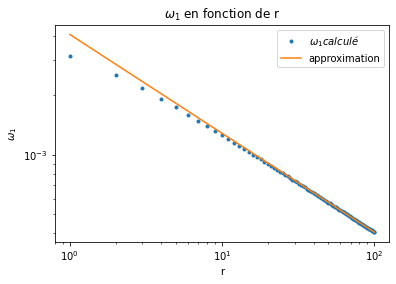

In [11]:
plt.plot(r_tab2,omega2[peak_tab2],".",label="$\omega_1 calculé$")
plt.loglog()
plt.xlabel("r")
plt.ylabel("$\omega_1$")
plt.title("$\omega_1$ en fonction de r")
plt.plot(r_tab2,4.06/(N*np.sqrt(r_tab2)),label="approximation")
plt.legend()

Nous remarquons que notre approximation est correcte pour $r \to 10^2$.